In [1]:
import pandas as pd
df = pd.read_csv('tickets prices prediction.csv')
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [3]:
df['stop'].unique()

array(['non-stop ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t

In [4]:
# Data Preprocessing
# Clean the 'stop' column
df['stop'] = df['stop'].apply(lambda x: 'non-stop' if 'non-stop' in x else 'stop')

print(df)

             date    airline ch_code  num_code dep_time     from time_taken  \
0      11-02-2022  Air India      AI       868    18:00    Delhi    02h 00m   
1      11-02-2022  Air India      AI       624    19:00    Delhi    02h 15m   
2      11-02-2022  Air India      AI       531    20:00    Delhi    24h 45m   
3      11-02-2022  Air India      AI       839    21:25    Delhi    26h 30m   
4      11-02-2022  Air India      AI       544    17:15    Delhi    06h 40m   
...           ...        ...     ...       ...      ...      ...        ...   
93482  31-03-2022    Vistara      UK       822    09:45  Chennai    10h 05m   
93483  31-03-2022    Vistara      UK       826    12:30  Chennai    10h 25m   
93484  31-03-2022    Vistara      UK       832    07:05  Chennai    13h 50m   
93485  31-03-2022    Vistara      UK       828    07:00  Chennai    10h 00m   
93486  31-03-2022    Vistara      UK       822    09:45  Chennai    10h 05m   

           stop arr_time         to   price  
0    

In [5]:
# Clean and convert 'price' to numeric

df['price'] = df['price'].str.replace(',', '').astype(int)

In [7]:
# Extract useful information from 'date'
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [10]:
# Convert 'dep_time' and 'arr_time' to hour and minute
df['dep_hour'] = pd.to_datetime(df['dep_time']).dt.hour
df['dep_minute'] = pd.to_datetime(df['dep_time']).dt.minute

df['arr_hour'] = pd.to_datetime(df['arr_time']).dt.hour
df['arr_minute'] = pd.to_datetime(df['arr_time']).dt.minute                               

C:\Users\HP\AppData\Local\Temp\ipykernel_13096\1693970646.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dep_hour'] = pd.to_datetime(df['dep_time']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_13096\1693970646.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dep_minute'] = pd.to_datetime(df['dep_time']).dt.minute
C:\Users\HP\AppData\Local\Temp\ipykernel_13096\1693970646.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arr_hour'] = pd.to_datetime(df['arr_time']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_13096\1693970646.py:6: UserWarning: C

In [13]:
# Function to convert 'time_taken' to total minutes
def convert_time_to_minutes(time_str):
    time_str = time_str.replace('h', ' ').replace('m', '')
    parts = time_str.split()
    hours = int(parts[0]) if len(parts) > 0 else 0
    minutes = int(parts[1]) if len(parts) > 1 else 0
    return hours * 60 + minutes

# Apply the conversion function
df['time_taken'] = df['time_taken'].apply(convert_time_to_minutes)

In [19]:
# Label encoding for categorical features
from sklearn.preprocessing import LabelEncoder

label_cols = ['airline', 'from', 'to', 'stop']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [20]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,day,month,year,dep_hour,dep_minute,arr_hour,arr_minute
0,2022-02-11,0,AI,868,18:00,2,120,0,20:00,5,25612,11,2,2022,18,0,20,0
1,2022-02-11,0,AI,624,19:00,2,135,0,21:15,5,25612,11,2,2022,19,0,21,15
2,2022-02-11,0,AI,531,20:00,2,1485,1,20:45,5,42220,11,2,2022,20,0,20,45
3,2022-02-11,0,AI,839,21:25,2,1590,1,23:55,5,44450,11,2,2022,21,25,23,55
4,2022-02-11,0,AI,544,17:15,2,400,1,23:55,5,46690,11,2,2022,17,15,23,55


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        93487 non-null  datetime64[ns]
 1   airline     93487 non-null  int64         
 2   ch_code     93487 non-null  object        
 3   num_code    93487 non-null  int64         
 4   dep_time    93487 non-null  object        
 5   from        93487 non-null  int64         
 6   time_taken  93487 non-null  int64         
 7   stop        93487 non-null  int64         
 8   arr_time    93487 non-null  object        
 9   to          93487 non-null  int64         
 10  price       93487 non-null  int32         
 11  day         93487 non-null  int32         
 12  month       93487 non-null  int32         
 13  year        93487 non-null  int32         
 14  dep_hour    93487 non-null  int32         
 15  dep_minute  93487 non-null  int32         
 16  arr_hour    93487 non-

In [22]:
from sklearn.model_selection import train_test_split

# Selecting features and target variable
X = df.drop(columns=['price', 'date', 'dep_time', 'arr_time'])
y = df['price']

In [23]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Ensure all features are numeric before scaling
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

In [26]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Model Training
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# predictions

y_pred = model.predict(X_test)

In [29]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))
print('mean_squared_error: ', mean_squared_error(y_test, y_pred))
print('r2_score: ', r2_score(y_test, y_pred))

mean_absolute_error:  1594.7410143591878
mean_squared_error:  12761157.781073231
r2_score:  0.9245408684609671


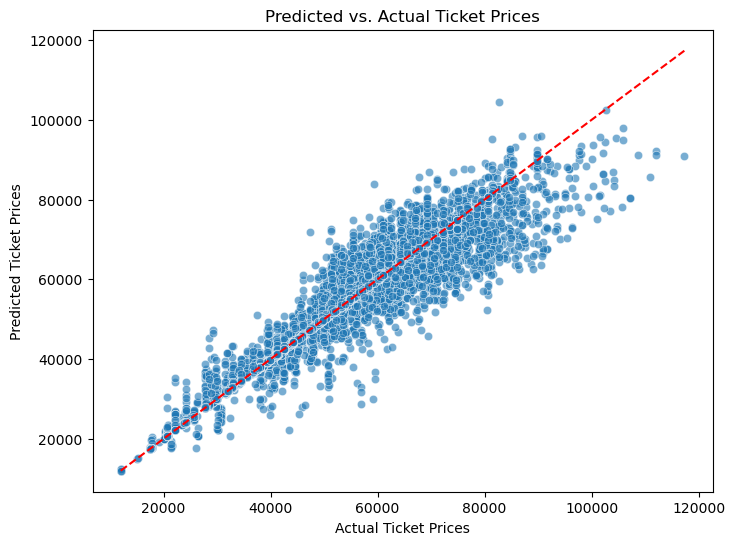

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting predicted vs actual prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Ticket Prices')
plt.ylabel('Predicted Ticket Prices')
plt.title('Predicted vs. Actual Ticket Prices')

# Line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  

plt.show()

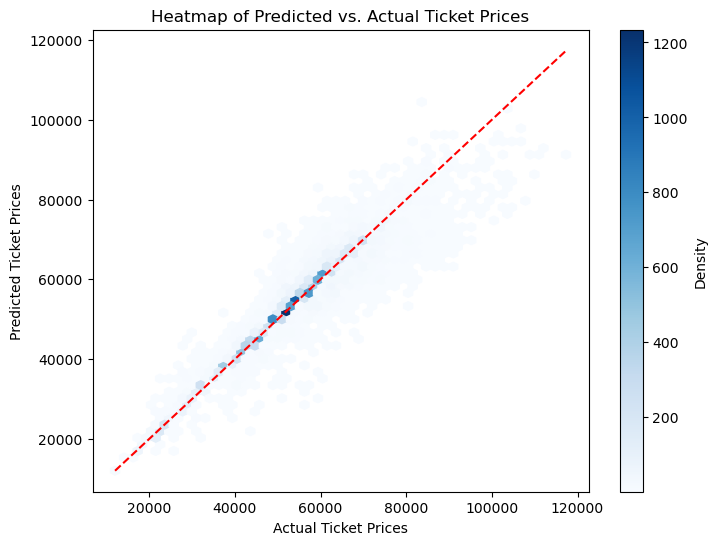

In [31]:
import numpy as np

# Creating a 2D histogram for density
plt.figure(figsize=(8, 6))
hb = plt.hexbin(y_test, y_pred, gridsize=50, cmap='Blues', mincnt=1)

# Adding a color bar
cb = plt.colorbar(hb)
cb.set_label('Density')

# Plotting the perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel('Actual Ticket Prices')
plt.ylabel('Predicted Ticket Prices')
plt.title('Heatmap of Predicted vs. Actual Ticket Prices')
plt.show()

In [41]:
# Use the columns from the original DataFrame before scaling
original_columns = X.columns  # Assuming X is the DataFrame before scaling

# Align the input data with the original columns
sample_df = sample_df.reindex(columns=original_columns, fill_value=0)

# Scaling the input features
sample_scaled = scaler.transform(sample_df)

# Predicting the ticket price
predicted_price = model.predict(sample_scaled)
print(f'Predicted Ticket Price: {predicted_price[0]:.2f}')

Predicted Ticket Price: 24998.84


In [45]:
!pip install joblib

In [49]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, 'ticket_price_prediction_model.pkl')

['ticket_price_prediction_model.pkl']

In [50]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']